In [ ]:
# import pandas as pd

file_path = r"C:\Users\krish\Downloads\winequality-red.csv"


df = pd.read_csv(file_path)

print(df.head())


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [7]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

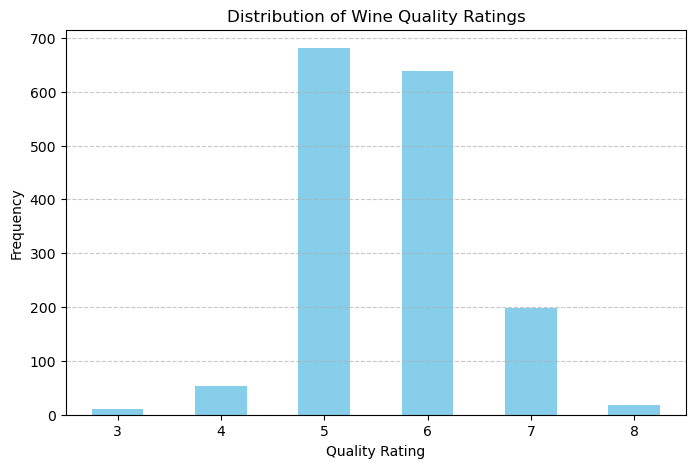

In [8]:
import matplotlib.pyplot as plt

quality_counts = df['quality'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
quality_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


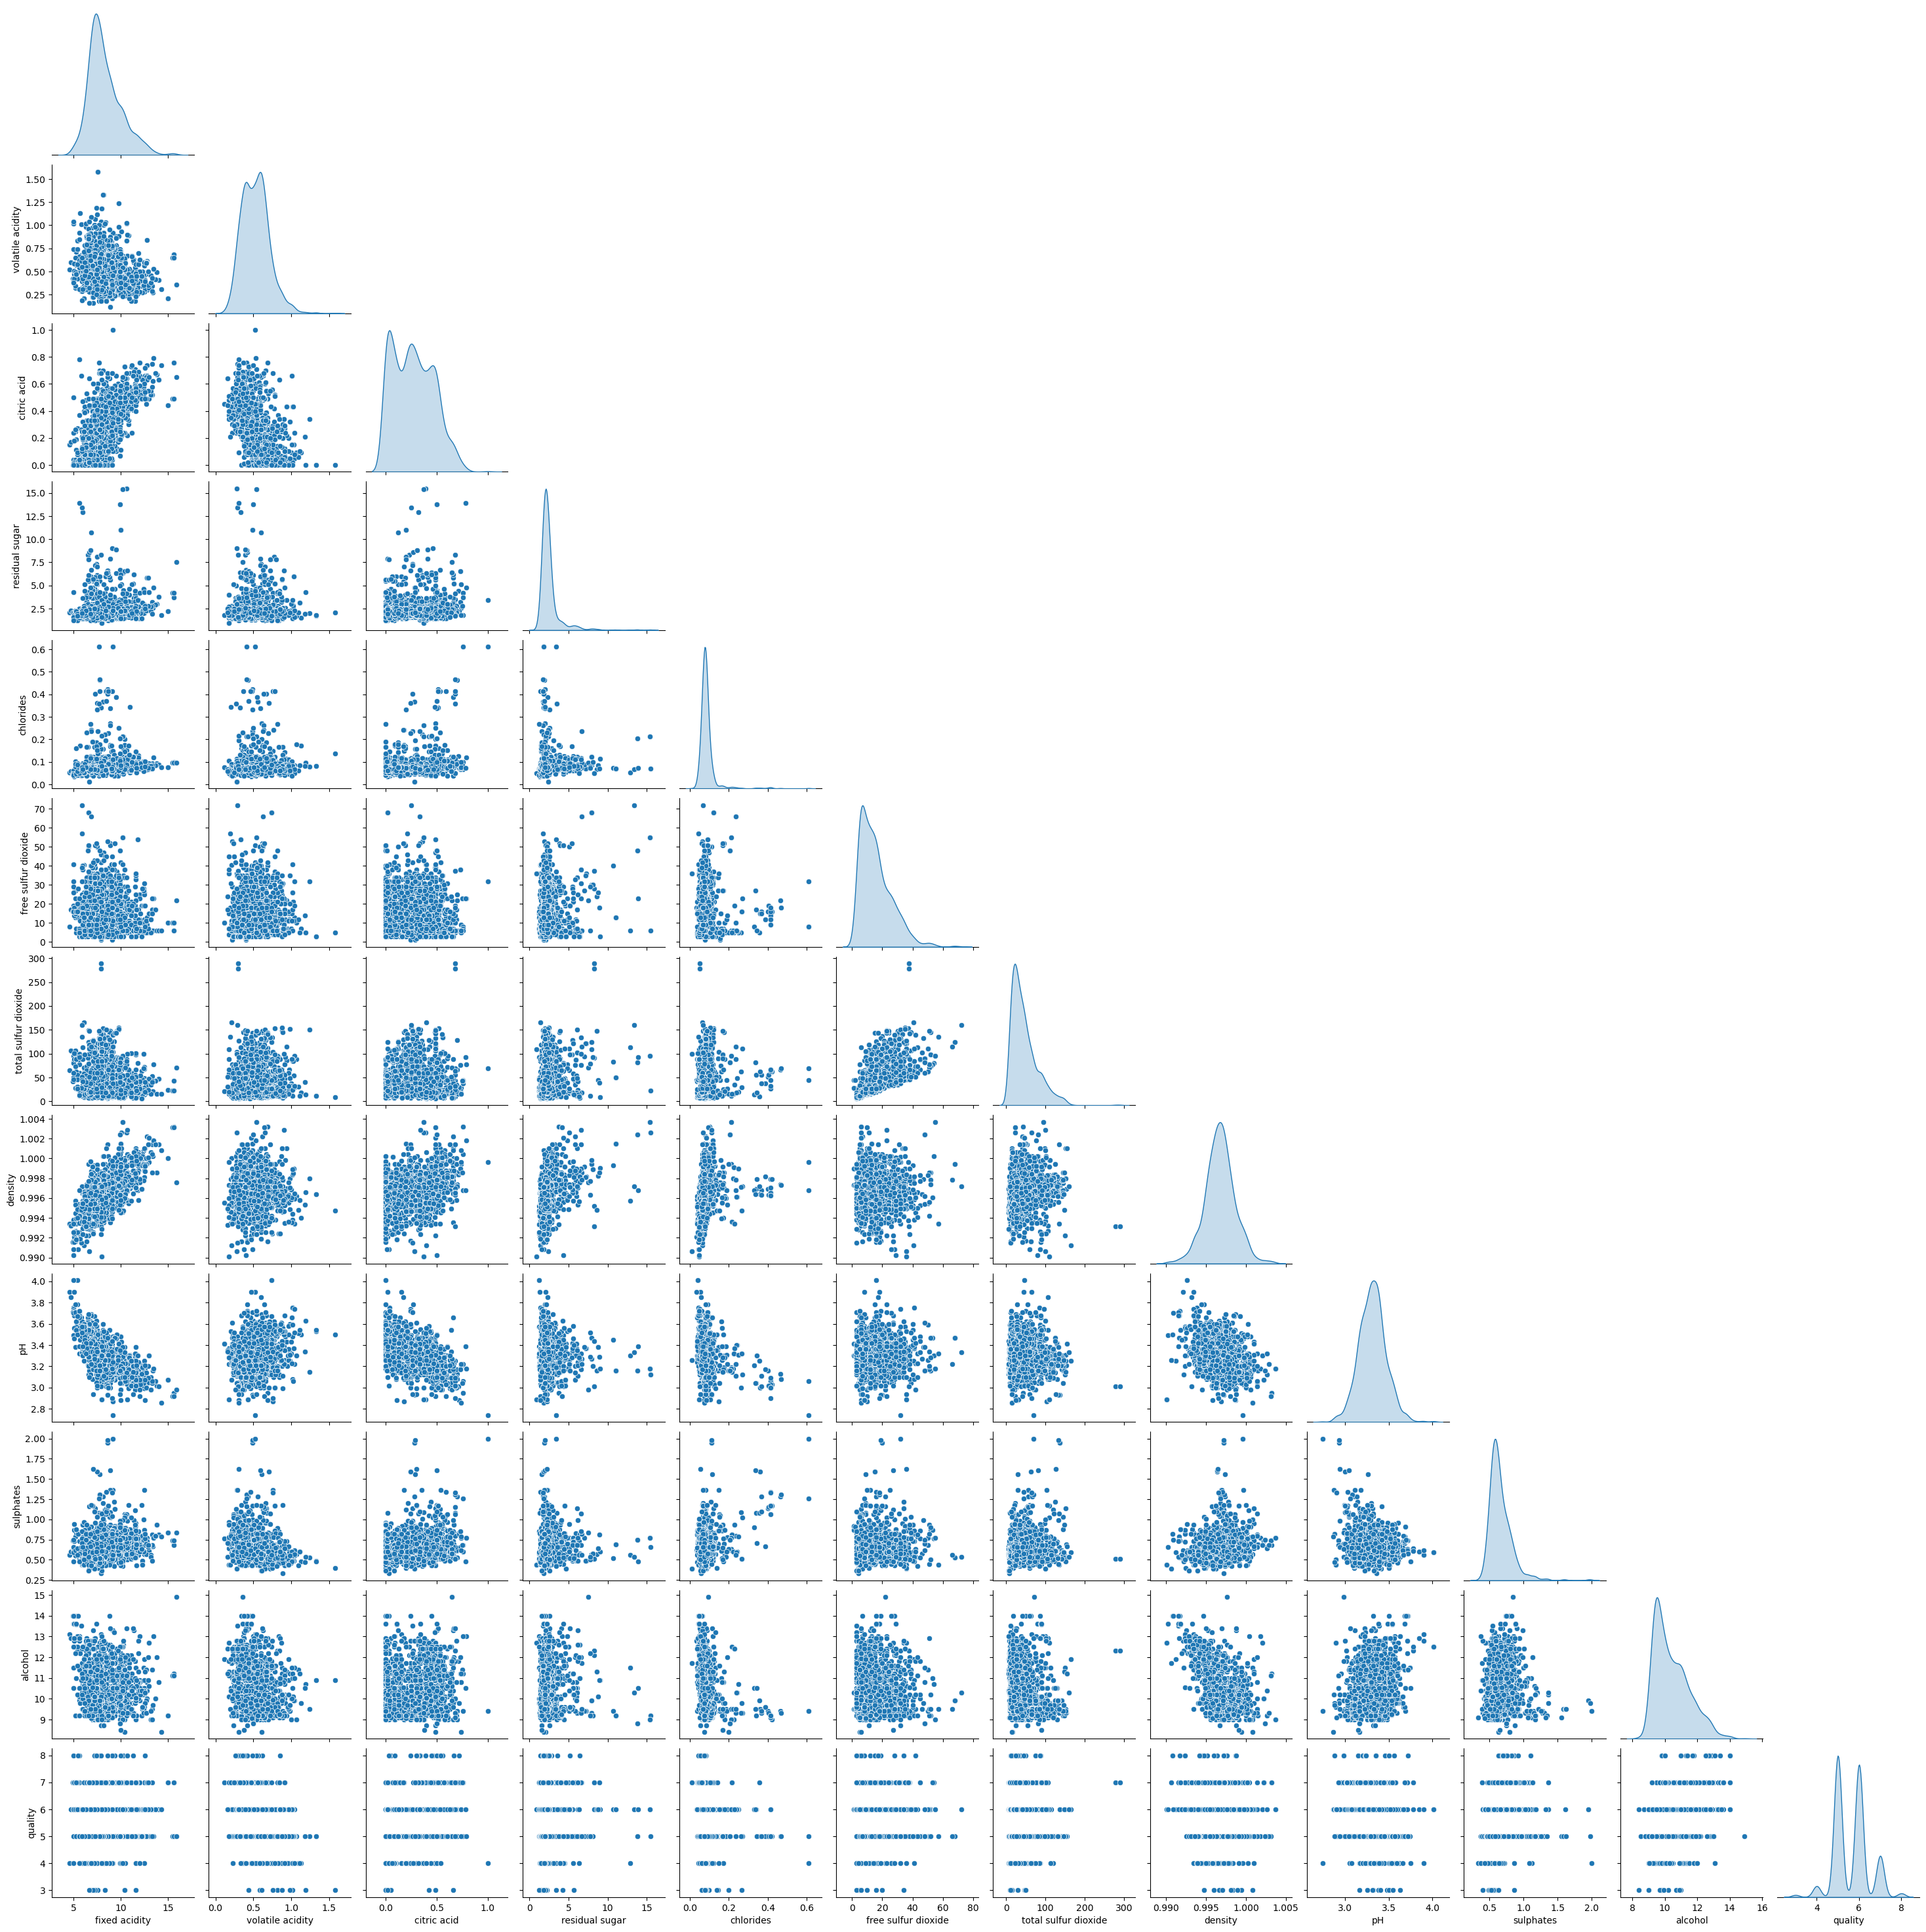

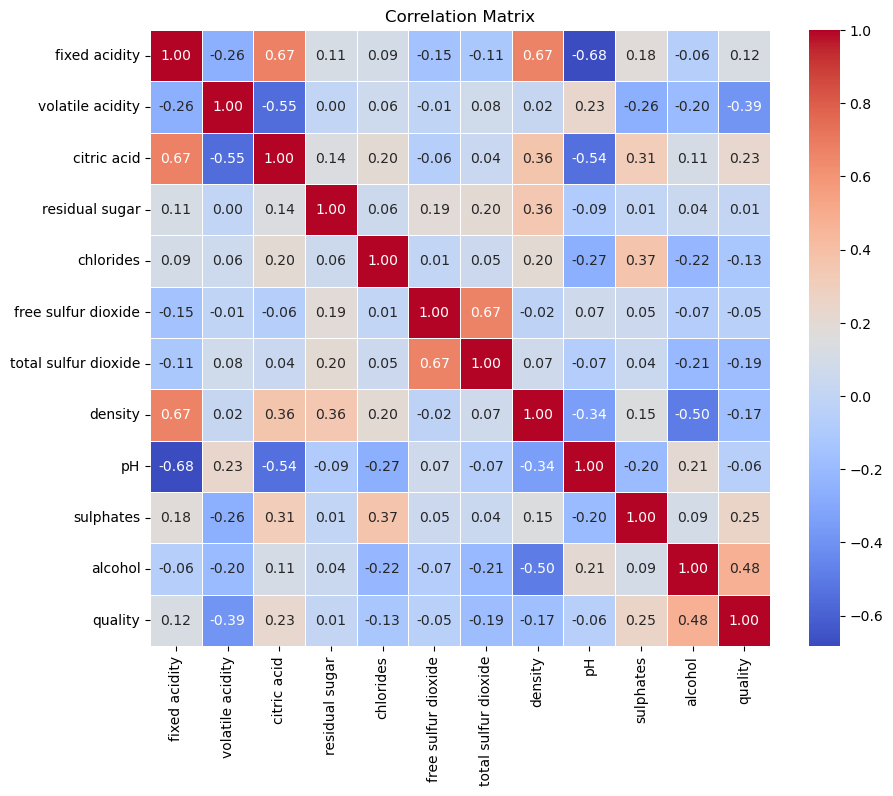

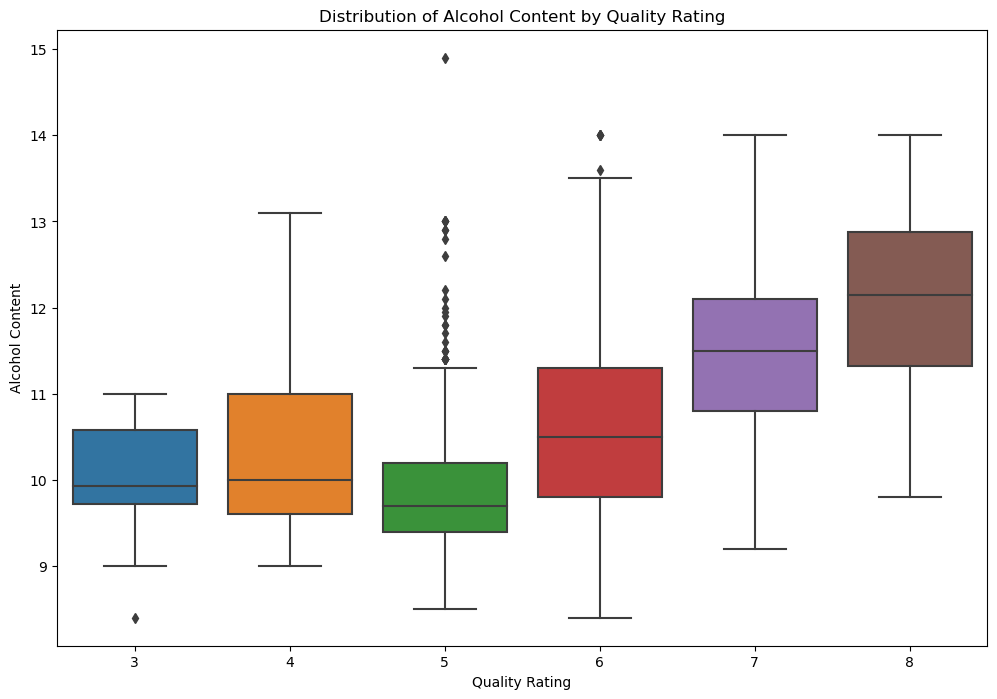

In [10]:

import seaborn as sns

sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Distribution of Alcohol Content by Quality Rating')
plt.xlabel('Quality Rating')
plt.ylabel('Alcohol Content')
plt.show()


In [19]:
import numpy as np

df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

df['log_density'] = np.log(df['density'])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.3900710908635001


In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'alpha': 0.1}
Best score: 0.43936491742028033


In [23]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -cv_scores.mean())


Cross-validated MSE: 0.4375050167126939


In [24]:

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


                 Feature  Coefficient
0          fixed acidity     0.305345
1       volatile acidity    -0.722139
2            citric acid     0.135807
3         residual sugar     0.007582
4              chlorides    -1.799050
5    free sulfur dioxide     0.005651
6   total sulfur dioxide    -0.003619
7                density -1948.894478
8                     pH    -0.390627
9              sulphates     0.838648
10               alcohol     0.283652
11         total_acidity    -0.280988
12           log_density  1932.006761
